**Using this template**

1. Change notebook title to assignment title you working on, eg. `Graded Challenge 1 or Milestone 1`
2. Put your identity such as name and batch number below notebook title.
3. Write your description before do any work. State your purpose of this assignment and what you are trying to achieve. 
4. Look at the rubric of this assignment and make sure you understand the criteria.
5. Code your solution in the cell provided below the working area section.
6. State your conlusions, findings, and any other relevant information in the cell provided below the conclusions sections.
7. Save this notebook and rename it to assignment title you working on  eg. `Graded Challenge 1 or Milestone 1`
8. Push your assignment before deadline.
9. Good Luck!

# Milestone 1

Nikki Satmaka - Batch 11

## Description

The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data
Find if there's any insight that can be gained from the data

This data and its analysis can be visualized interactively through this web app

https://nikki-satmaka-ftds-011-p0m1.herokuapp.com/

### Objective

- Find out which branch is more active
- Find out the shopping habit of customers

### Problem Statement

- Find out the average rating of each branch
- Find out the revenue of each branch
- Find out how much people tend to spend for a transaction
- Find out what time is the peak hour
- What are people's preference of payment method
- Is there any differences between male and female customers?

## Working Area

```txt
Put your code, analysis, everything below this line

Make sure to check everything the rubric requires before you submit
```

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats

sns.set_theme(style='darkgrid', palette='deep')

pd.set_option('display.precision', 2)

%matplotlib inline

### Useful Functions

In [2]:
def unique_count(data):
    """
    Count the number of unique categories in each object dtype columns

    Parameters
    ----------
    data : DataFrame

    Returns
    -------
    DataFrame
        Number of unique values of each column
    """
    return pd.DataFrame.from_records(
        [(col, data[col].nunique()) for col in data.select_dtypes('object').columns],
        columns=['Column Name', 'Num Unique']
    )

In [3]:
def categorize(data, threshold=20, exclusion=[]):
    """
    Convert object dtype columns within a certain threshold into categorical dtype

    Parameters
    ----------
    data : DataFrame
    threshold : integer or real
        The max number of unique values (inclusive) allowed to determine
        whether a column will be converted into categorical data
    exclusion : array-like, Series, or list of arrays/Series
        Columns to be excluded from conversion

    Returns
    -------
    DataFrame
        DataFrame which columns have been categorized
    """
    if type(data) != pd.DataFrame:
        raise TypeError('Not a valid DataFrame')

    if type(threshold) != int:
        raise TypeError('threshold only accepts integer')
    
    if type(exclusion) not in (list, tuple, pd.Series):
        raise TypeError('exclusion only accepts list, tuple or pandas Series')

    for col in data.select_dtypes('object').columns:
        if data[col].nunique() <= threshold and col not in exclusion:
            data[col] = pd.Categorical(data[col])

    return data

## Data Loading

In [4]:
df = pd.read_csv('./data/supermarket_sales.csv', parse_dates=[['Date', 'Time']])

# Tidy up column names to make it look pretty
df.columns = df.columns.str.replace('_', ' ').str.title()
df = df.rename(columns={'Invoice Id': 'Invoice ID', 'Cogs':'COGS'})

df.head()

Date Time   Invoice ID Branch       City Customer Type  Gender  \
0 2019-01-05 13:08:00  750-67-8428      A     Yangon        Member  Female   
1 2019-03-08 10:29:00  226-31-3081      C  Naypyitaw        Normal  Female   
2 2019-03-03 13:23:00  631-41-3108      A     Yangon        Normal    Male   
3 2019-01-27 20:33:00  123-19-1176      A     Yangon        Member    Male   
4 2019-02-08 10:37:00  373-73-7910      A     Yangon        Normal    Male   

             Product Line  Unit Price  Quantity  Tax 5%   Total      Payment  \
0       Health and beauty       74.69         7   26.14  548.97      Ewallet   
1  Electronic accessories       15.28         5    3.82   80.22         Cash   
2      Home and lifestyle       46.33         7   16.22  340.53  Credit card   
3       Health and beauty       58.22         8   23.29  489.05      Ewallet   
4       Sports and travel       86.31         7   30.21  634.38      Ewallet   

     COGS  Gross Margin Percentage  Gross Income  Rating  
0  522.83                     4.76         26.14     9.1  
1   76.40                     4.76          3.82     9.6  
2  324.31                     4.76         16.22     7.4  
3  465.76                     4.76         23.29     8.4  
4  604.17                     4.76         30.21     5.3

The shape of the data

In [5]:
df.shape

(1000, 16)

Taking a peek at the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date Time                1000 non-null   datetime64[ns]
 1   Invoice ID               1000 non-null   object        
 2   Branch                   1000 non-null   object        
 3   City                     1000 non-null   object        
 4   Customer Type            1000 non-null   object        
 5   Gender                   1000 non-null   object        
 6   Product Line             1000 non-null   object        
 7   Unit Price               1000 non-null   float64       
 8   Quantity                 1000 non-null   int64         
 9   Tax 5%                   1000 non-null   float64       
 10  Total                    1000 non-null   float64       
 11  Payment                  1000 non-null   object        
 12  COGS                     1000 non-n

## Data Cleaning

Checking for null values

In [7]:
df.isna().sum()

Date Time                  0
Invoice ID                 0
Branch                     0
City                       0
Customer Type              0
Gender                     0
Product Line               0
Unit Price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Payment                    0
COGS                       0
Gross Margin Percentage    0
Gross Income               0
Rating                     0
dtype: int64

Data is clean.\
Let's check the features with `object` dtype so we can decide whether we can make it categorical

In [8]:
unique_count(df)

Column Name  Num Unique
0     Invoice ID        1000
1         Branch           3
2           City           3
3  Customer Type           2
4         Gender           2
5   Product Line           6
6        Payment           3

I'm gonna change them all aside from `Invoice ID` since it doesn't have a limited number of unique values

In [9]:
df = categorize(df, 20)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date Time                1000 non-null   datetime64[ns]
 1   Invoice ID               1000 non-null   object        
 2   Branch                   1000 non-null   category      
 3   City                     1000 non-null   category      
 4   Customer Type            1000 non-null   category      
 5   Gender                   1000 non-null   category      
 6   Product Line             1000 non-null   category      
 7   Unit Price               1000 non-null   float64       
 8   Quantity                 1000 non-null   int64         
 9   Tax 5%                   1000 non-null   float64       
 10  Total                    1000 non-null   float64       
 11  Payment                  1000 non-null   category      
 12  COGS                     1000 non-n

Let's create additional features separating the timestamp for easier processing

In [10]:
df['Year'] = df['Date Time'].dt.year
df['Month'] = df['Date Time'].dt.month
# df['Week'] = df['Date Time'].dt.isocalendar().week
df['Day'] = df['Date Time'].dt.day
df['Day of Week'] = df['Date Time'].dt.day_name()
df['Hour'] = df['Date Time'].dt.hour

# Make 'Day of Week' Categorical
day_cats = ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')
df['Day of Week'] = pd.Categorical(df['Day of Week'], categories=day_cats, ordered=True)

df.head()

Date Time   Invoice ID Branch       City Customer Type  Gender  \
0 2019-01-05 13:08:00  750-67-8428      A     Yangon        Member  Female   
1 2019-03-08 10:29:00  226-31-3081      C  Naypyitaw        Normal  Female   
2 2019-03-03 13:23:00  631-41-3108      A     Yangon        Normal    Male   
3 2019-01-27 20:33:00  123-19-1176      A     Yangon        Member    Male   
4 2019-02-08 10:37:00  373-73-7910      A     Yangon        Normal    Male   

             Product Line  Unit Price  Quantity  Tax 5%  ...      Payment  \
0       Health and beauty       74.69         7   26.14  ...      Ewallet   
1  Electronic accessories       15.28         5    3.82  ...         Cash   
2      Home and lifestyle       46.33         7   16.22  ...  Credit card   
3       Health and beauty       58.22         8   23.29  ...      Ewallet   
4       Sports and travel       86.31         7   30.21  ...      Ewallet   

     COGS  Gross Margin Percentage  Gross Income  Rating  Year  Month  Day  \
0  522.83                     4.76         26.14     9.1  2019      1    5   
1   76.40                     4.76          3.82     9.6  2019      3    8   
2  324.31                     4.76         16.22     7.4  2019      3    3   
3  465.76                     4.76         23.29     8.4  2019      1   27   
4  604.17                     4.76         30.21     5.3  2019      2    8   

   Day of Week Hour  
0     Saturday   13  
1       Friday   10  
2       Sunday   13  
3       Sunday   20  
4       Friday   10  

[5 rows x 21 columns]

Data is ready to be processed

## Data Exploration

Let's look at some basic statistics

In [11]:
df.describe()

Unit Price  Quantity   Tax 5%    Total     COGS  \
count     1000.00   1000.00  1000.00  1000.00  1000.00   
mean        55.67      5.51    15.38   322.97   307.59   
std         26.49      2.92    11.71   245.89   234.18   
min         10.08      1.00     0.51    10.68    10.17   
25%         32.88      3.00     5.92   124.42   118.50   
50%         55.23      5.00    12.09   253.85   241.76   
75%         77.94      8.00    22.45   471.35   448.91   
max         99.96     10.00    49.65  1042.65   993.00   

       Gross Margin Percentage  Gross Income   Rating    Year    Month  \
count                  1000.00       1000.00  1000.00  1000.0  1000.00   
mean                      4.76         15.38     6.97  2019.0     1.99   
std                       0.00         11.71     1.72     0.0     0.84   
min                       4.76          0.51     4.00  2019.0     1.00   
25%                       4.76          5.92     5.50  2019.0     1.00   
50%                       4.76         12.09     7.00  2019.0     2.00   
75%                       4.76         22.45     8.50  2019.0     3.00   
max                       4.76         49.65    10.00  2019.0     3.00   

           Day     Hour  
count  1000.00  1000.00  
mean     15.26    14.91  
std       8.69     3.19  
min       1.00    10.00  
25%       8.00    12.00  
50%      15.00    15.00  
75%      23.00    18.00  
max      31.00    20.00

Let's look at a quick heatmap of the correlation of data with numeric features

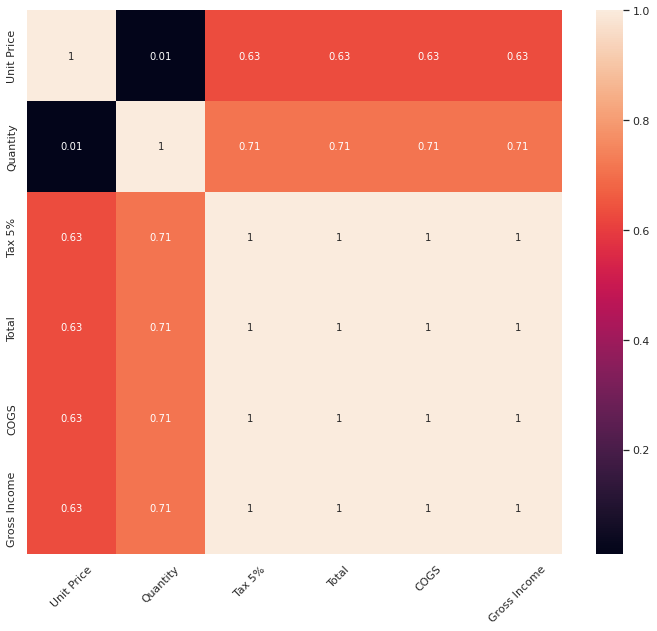

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(
    data=np.around(df.iloc[:, :-6].corr().dropna(how='all').dropna(axis=1, how='all'), 2),
    annot=True
)
plt.xticks(rotation=45)
plt.show()

We can see that all features relating to the transaction itself are highly correlated, aside from quantity and price.\
The only other numeric feature not directly related to the transaction value itself is rating and it has very low correlation value with the others

Let's see in which city are each branch located

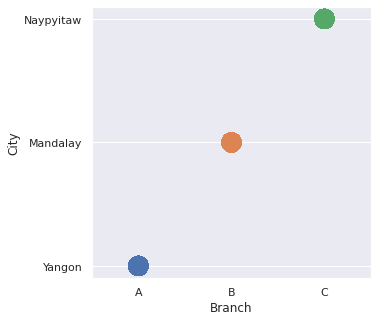

In [13]:
plt.figure(figsize=(5, 5))
sns.stripplot(x='Branch', y='City', jitter=False, size=20, data=df)
plt.show()

We can see that branch A is located in Yangon, branch B in Mandalay, and branch C in Naypyitaw

Let's first see which of the three branches have the most transactions

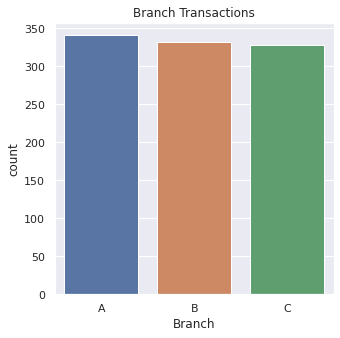

In [14]:
plt.figure(figsize=(5, 5))
sns.countplot(x='Branch', data=df).set_title('Branch Transactions')
plt.show()

Branch A in Yangon have the most transactions, but the difference is marginal. All branches have about the same number of transactions

Let's see the rating of each branch

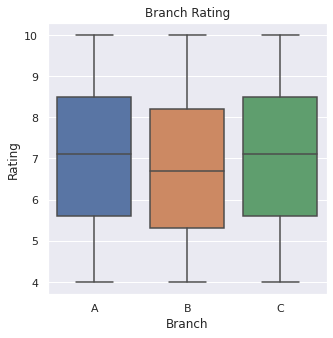

In [15]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='Branch', y='Rating', data=df).set_title('Branch Rating')
plt.show()

They have about the same rating, averaging at around 7

Let's see the total revenue of each branches within these 3 months

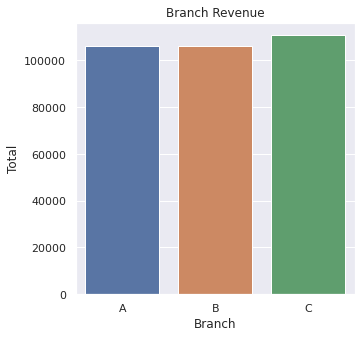

In [16]:
plt.figure(figsize=(5, 5))
sns.barplot(x='Branch', y='Total', ci=None, estimator=sum, data=df).set_title('Branch Revenue')
plt.show()

We saw that branch C didn't have as much transactions as branch A, but the Total Revenue achieved by branch C is higher than that of branch A and branch B. This is interesting

Let's further dissect into each of their revenue by month

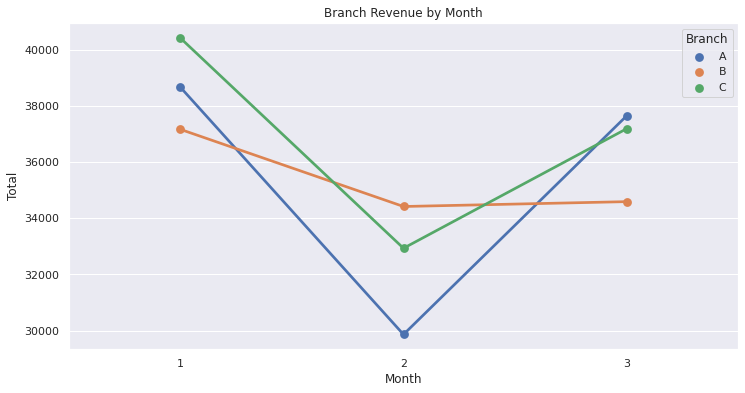

In [17]:
plt.figure(figsize=(12, 6))
sns.pointplot(x='Month', y='Total', estimator=sum, hue='Branch', ci=None, data=df).set_title('Branch Revenue by Month')
plt.show()

We can see that the amount of revenue for branch A dropped more compared to the other two

Let's see what product line dropped in branch A

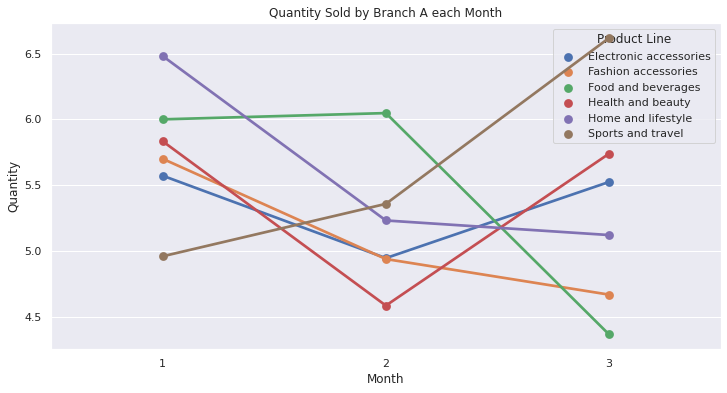

In [18]:
plt.figure(figsize=(12, 6))
sns.pointplot(x='Month', y='Quantity', hue='Product Line', ci=None, data=df[df['Branch'] == 'A']).set_title('Quantity Sold by Branch A each Month')
plt.show()

Every product line dropped in February aside from Food and beverages. However, Food and beverages dropped in March when the other lines picked up

Is there any correlation between rating and the amount of sales generated?

In [19]:
px.scatter(df, x='Rating', y='Total', color='Branch').show()

Seems pretty random

Let's see if there's a preference over product lines between male and female

In [20]:
px.bar(df, x='Product Line', y='Total', color='Gender', barmode='group').show()

Seems like there are quite a difference in Health and beauty, home and lifestyle, and food and beverages product lines

Is there a preference over payment method in each branch?

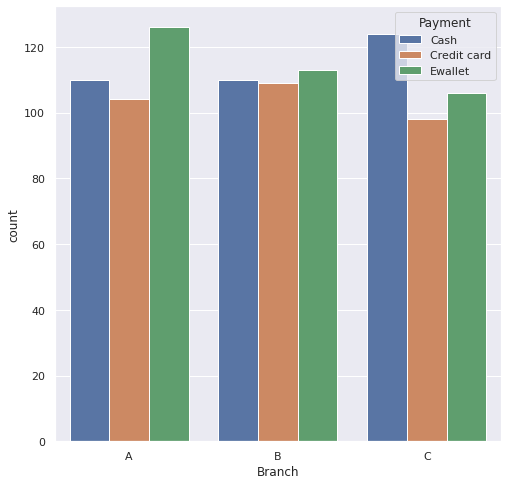

In [21]:
plt.figure(figsize=(8, 8))
sns.countplot(x='Branch', hue='Payment', data=df)
plt.show()

Seems like the customers in branch A highly prefer using ewallet while branch C's prefer cash

How much do people typically spend on a transaction?

In [22]:
px.histogram(df, x='Total', nbins=50).show()

Around $100 for a transaction

Do members shop more often than non-members?

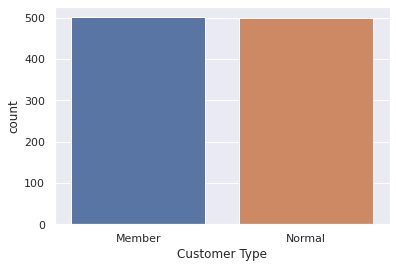

In [23]:
plt.figure()
sns.countplot(data=df, x='Customer Type')
plt.show()

Doesn't seem so

But do they spend more?

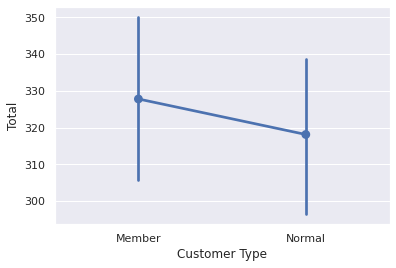

In [24]:
plt.figure()
sns.pointplot(data=df, x='Customer Type', y='Total', barmode='group')
plt.show()

Yes, members tend to spend more than non-members

Let's see at what time do people tend to shop

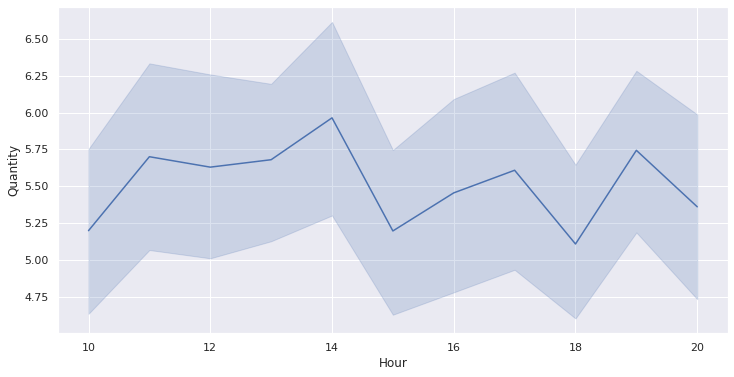

In [25]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='Quantity', data=df)
plt.show()

Seems like around 12-2pm and 7pm are the peak hour, but there are not really that big of a difference between each hour

Do people tend to splurge and spend more on the weekend?

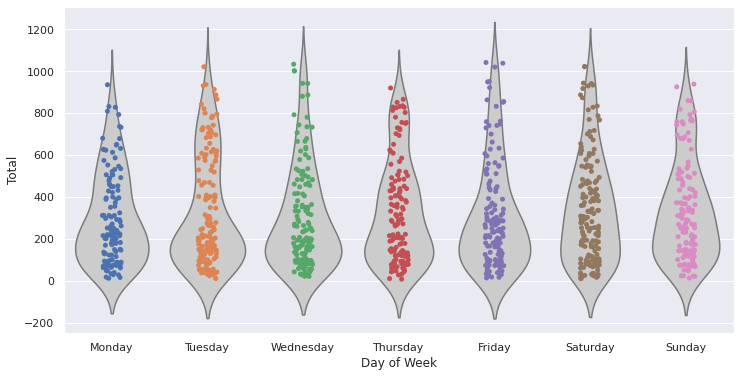

In [26]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Day of Week', y='Total', data=df, inner=None, color='.8')
sns.stripplot(x='Day of Week', y='Total', data=df)
plt.show()

Doesn't seem like it. Pretty evenly distributed between each day

### Hypothesis Testing

In [27]:
fig = px.box(
    df[df['Product Line'] == 'Health and beauty'],
    x='Branch',
    y='Total',
    color='Gender',
    title='Health and beauty product Average Sales'
)
fig.show()



We want to check, whether the average sales for health and beauty products between female and male are significantly different using two sample independent two tailed test

$H_{0}: \mu_{health\ female} = \mu_{health\ male}$\
$H_{1}: \mu_{health\ female} \neq \mu_{health\ male}$



In [28]:
health_female = df[(df['Product Line'] == 'Health and beauty') & (df['Gender'] == 'Female')]['Total']
health_male = df[(df['Product Line'] == 'Health and beauty') & (df['Gender'] == 'Male')]['Total']

print(f'Average Sales of Health and beauty product for female: ${health_female.mean():.2f}')
print(f'Average Sales of Health and beauty product for male: ${health_male.mean():.2f}')

Average Sales of Health and beauty product for female: $290.02
Average Sales of Health and beauty product for male: $348.10


In [29]:
ci_health_female = stats.norm.interval(0.95, health_female.mean(), health_female.std())
ci_health_male = stats.norm.interval(0.95, health_male.mean(), health_male.std())

print(f'The confidence intervals from Health and beauty product sales for female is between {ci_health_female[0]:.2f} and {ci_health_female[1]:.2f}')
print(f'The confidence intervals from Health and beauty product sales for male is between {ci_health_male[0]:.2f} and {ci_health_male[1]:.2f}')


The confidence intervals from Health and beauty product sales for female is between -131.87 and 711.90
The confidence intervals from Health and beauty product sales for male is between -143.63 and 839.83


In [30]:
t_stat, p_val = stats.ttest_ind(health_female, health_male)
print('p-value:', p_val)
print('t-statistics:',t_stat)

p-value: 0.13714336070555208
t-statistics: -1.4945089815864039


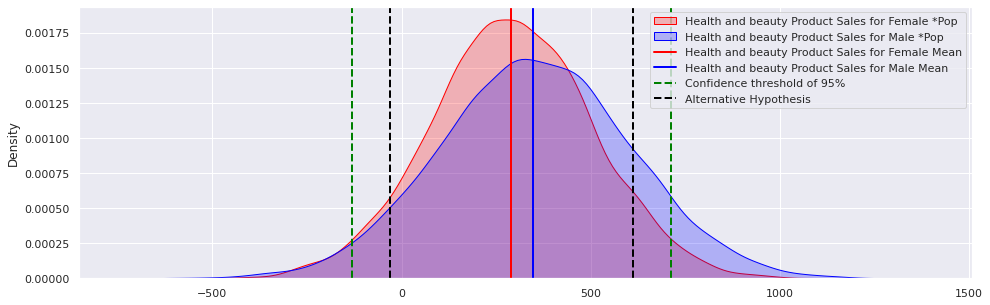

In [31]:
health_female_pop = np.random.normal(health_female.mean(), health_female.std(), 10000)
health_male_pop = np.random.normal(health_male.mean(), health_male.std(), 10000)

plt.figure(figsize=(16, 5))
sns.kdeplot(health_female_pop, label='Health and beauty Product Sales for Female *Pop', color='red', shade=True)
sns.kdeplot(health_male_pop, label='Health and beauty Product Sales for Male *Pop', color='blue', shade=True)

plt.axvline(health_female.mean(), color='red', linewidth=2, label='Health and beauty Product Sales for Female Mean')
plt.axvline(health_male.mean(), color='blue', linewidth=2, label='Health and beauty Product Sales for Male Mean')

plt.axvline(ci_health_female[1], color='green', linestyle='dashed', linewidth=2, label='Confidence threshold of 95%')
plt.axvline(ci_health_female[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(health_female_pop.mean() + t_stat*health_female_pop.std(), color='black', linestyle='dashed', linewidth=2, label='Alternative Hypothesis')
plt.axvline(health_female_pop.mean() - t_stat*health_female_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()
plt.show()


**Based on the result above, having a p value of more than `0.05`, we can conclude that we fail to reject the null hypothesis**, which means there are no significant difference in Health and beauty product sales between Female and Male gender

## Conclusions, Assumptions, Overall Analysis

- Every product has the same gross margin percentage
- Branch A is located in Yangon, branch B in Mandalay, and branch C in Naypyitaw
- The rating of each branch is about the same and there is no correlation between rating and the amount of transaction
- There are quite a difference in Health and beauty, home and lifestyle, and food and beverages product lines between male and female customers
- The customers in branch A highly prefer using ewallet while branch C's prefer cash
- People tend to spend around $100 per transaction
- Members doesn't shop more often than normal customers, but they do tend to spend more money
- The peak hour is around 12-2pm and 7pm, but there are not really that big of a difference between each hour
- People doesn't seem to spend more on weekends
- There are no significant difference between the average amount spent for health and beauty products between male and female